In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
# matplotlib.use('TKAgg')
import os, json, shutil
import argparse
from scipy.optimize import curve_fit as cf
# note : most functions needed for running this notebook can be found in tc_utils.
from thermal_conductivity.tc_utils import *

In [3]:
mat = "Stainless_Steel_310"
path_to_RAW = f"thermal_conductivity/lib/{mat}/RAW"

big_data, data_dict = parse_raw(mat, path_to_RAW, plots=True, weight_const=0.00)
T, k, koT, weights = [big_data[:,0], big_data[:,1], big_data[:,2], big_data[:,3]]

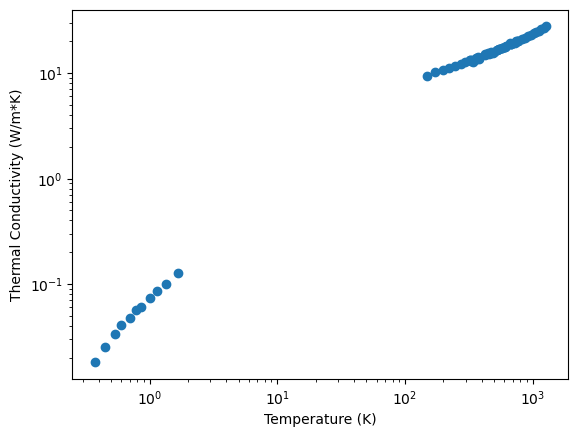

In [9]:
plt.plot(T, k, 'o', label='k')
plt.xlabel('Temperature (K)')
plt.ylabel('Thermal Conductivity (W/m*K)')
plt.semilogx()
plt.semilogy()
plt.show()

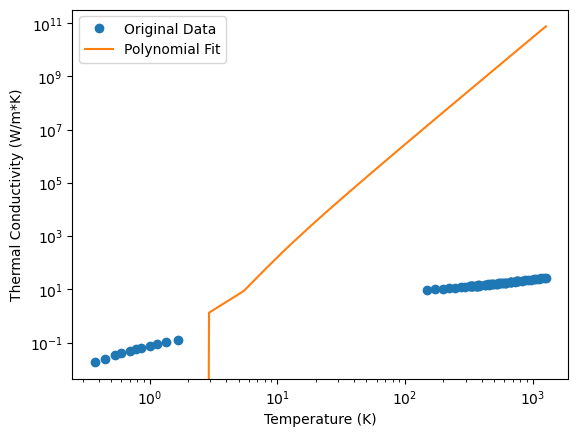

In [13]:
# Fit a polynomial of degree 2 to the data
coefficients = np.polyfit(np.log10(T), np.log10(k), 4)
polynomial = np.poly1d(coefficients)

# Generate fitted values
T_fit = np.linspace(min(T), max(T), 500)
k_fit = polynomial(T_fit)

# Plot the original data and the fit
plt.plot(T, k, 'o', label='Original Data')
plt.plot(T_fit, k_fit, '-', label='Polynomial Fit')
plt.semilogx()
plt.semilogy()
plt.xlabel('Temperature (K)')
plt.ylabel('Thermal Conductivity (W/m*K)')
plt.legend()
plt.show()